In [1]:
from numpy import *
from matplotlib.pyplot import *
import scipy.linalg

In [2]:
data = loadtxt('C:\\Users\\shinj\\Dropbox\\Jacobs Spring 2017\\Project Readings\\Digits\\mfeat-pix.txt')

In [3]:
#Spliting Data into training and Test (1-10)
training = vstack((data[:100],  data[200:300], data[400:500], data[600:700], data[800:900], data[1000:1100], data[1200:1300], data[1400:1500], data[1600:1700], data[1800:1900]))

In [4]:
test = vstack((data[100:200], data[300:400], data[500:600], data[700:800], data[900:1000], data[1100:1200], data[1300:1400], data[1500:1600], data[1700:1800], data[1900:2000]))

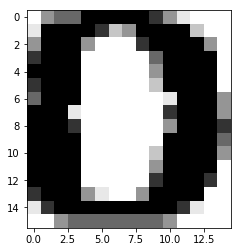

In [5]:
#Shape Check
image = data[0].reshape(16,15)
matplotlib.pyplot.imshow(image, cmap = 'Greys')
show()

In [6]:
#Scaling of Original Data
scaled_input = training/99*0.99 + 0.01

In [13]:
#Reshaping Training data into 16 x 15
tr = zeros((16,0))
for i in range(1000):
        tr = concatenate((tr, scaled_input[i].reshape(16,15)), axis = 1)

In [14]:
#Reshaping Test data into 16 x 15
te = zeros((16,0))
for i in range(1000):
    te= concatenate((te, scaled_output[i].reshape(16,15)), axis = 1)

In [15]:
train = zeros((16, 0))

In [24]:
#Resovoir Setting
trainLen = 1000
testLen = 1000
inSize = 16
outSize = 10
resSize = 284

In [25]:
#Creating W and Win
random.seed(2017)
Win = ((random.rand(resSize, 1+ inSize))-0.5) *1
W = (random.rand(resSize,resSize) -0.5) *1
rhoW = max(abs(linalg.eig(W)[0]))
W *= 1.38/ rhoW

In [66]:
#Creating x and X
x = np.zeros((resSize, 1))
X = np.zeros((1+inSize +resSize,0))

In [67]:
#Creating Bias
bias = (random.rand(resSize, 1)-0.5)/10

In [68]:
#First Harvesting
for i in range(trainLen):
    for j in range(i*15, i*15+15):
        x = np.zeros((resSize, 1))
        x = tanh(dot(Win, hstack((1, tr[:,j]))).reshape(resSize, 1)+dot(W, x)+ bias)
        X= concatenate((X, vstack((1, tr[:,j].reshape(16,1), x))), axis = 1)

In [69]:
X.shape

(301, 15000)

In [70]:
A = np.zeros((1+inSize+resSize, 0))
#For Plotting
for i in range(1):
    a = np.zeros((resSize, 1))
    for j in range(15):
        a = tanh(dot(Win, hstack((1, tr[:,j]))).reshape(resSize, 1)+dot(W, a)+ bias)
        A= concatenate((A, vstack((1, tr[:,j].reshape(16,1), a))), axis = 1)

In [71]:
A.shape

(301, 15)

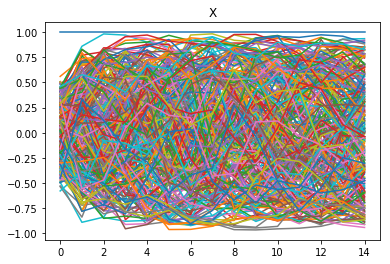

In [72]:
figure(2).clear()
plot(A.T)
title('X')
show()

In [73]:
#Creating D(Desired Output)
D = empty((10, 1000))
for i in range(10):
    for j in range(1000):
        D[i, j] = 0.01
for i in range(10):
    for j in range(i*100,i*100+100):
        D[i,j] = 0.99

In [74]:
D

array([[ 0.99,  0.99,  0.99, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       ..., 
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01, ...,  0.99,  0.99,  0.99]])

In [75]:
#Creating Ridge Regression 
b = 1e-1

In [76]:
#Calculating Wout
Wout = dot(dot(D,X.T),linalg.inv(np.dot(X, X.T)+ np.dot(b, np.identity(1+inSize+resSize))))

ValueError: shapes (10,1000) and (15000,301) not aligned: 1000 (dim 1) != 15000 (dim 0)

In [77]:
Wout.shape

(10, 301)

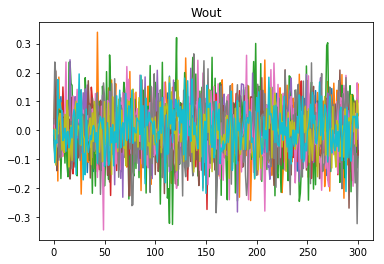

In [78]:
figure(2).clear()
plot(Wout.T)
title('Wout')
show()

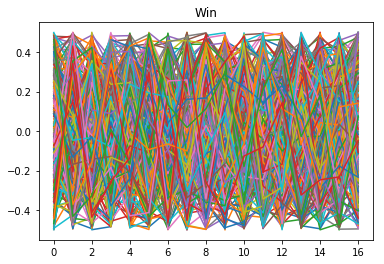

In [79]:
figure(3).clear()
plot(Win.T)
title('Win')
show()

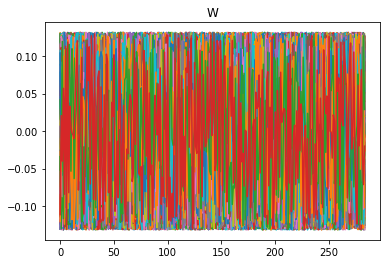

In [54]:
figure(4).clear()
plot(W)
title('W')
show()

In [55]:
#Calculating Y output from test data
Y = zeros((10, 0))
for i in range(1000):
    x = zeros((resSize, 1))
    y = zeros((10, 1))
    for k in range(15*i,15*i+15):
        x = tanh(dot(Win, hstack((1, te[:,k]))).reshape(resSize, 1)+dot(W, x)+ bias)
        y = dot(Wout, vstack((1, te[:,k].reshape(16,1), x)))
    Y = concatenate((Y, y), axis = 1)

In [56]:
Y.shape

(10, 1000)

In [57]:
#Error rate
etrain0 = 0
etrain2= 0
for i in range(10):
    etrain1= 0
    for j in range(trainLen):  
        etrain1 += square(Y[i,j] - D[i,j])
    etrain2 = sqrt(etrain1/trainLen)
    etrain0 += etrain2
etrain = etrain0/10

In [58]:
etrain

0.89401106199977498

In [59]:
#Scorecard
scorecard = []
score = 0
for i in range(1000):
    if argmax(Y[0:10, i]) == argmax(D[0:10, i]):
        scorecard.append(1)
        score += 1
    else:
        scorecard.append(0)
        print(i)
print("Accuracy: ", score/trainLen) 
print("Error Rate: ",  (trainLen-score)/trainLen)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
37

In [ ]:
Wout.shape

In [ ]:
figure(2).clear()
plot(Wout.T)
title('W Out')
show()

In [ ]:
figure(2).clear()
plot(Wout)
title('Y')
show()